# Assignment-1

# Name-Karishma Kansal
             Uid-18bcs6103
             Set-4
             AI&ML-1

# Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('insurance.csv',encoding="latin-1")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


# Data Preparation

# Dummy Variable

In [7]:
# Now we are checking for unique values of column age of dataframe df
print(df.sex.unique())

['female' 'male']


In [8]:
# so we can introduce dummy variable for sex column and here we are assigning male as 0 and female as 1.
df['sex'][df['sex'] == 'male'] = 0
df['sex'][df['sex'] == 'female'] = 1

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [10]:
# Now we are checking for unique values of column smoker of dataframe df
print(df.smoker.unique())

['yes' 'no']


In [11]:
#now as we have only two unique value for smoker column so we assign yes as 0 and no as 1
df['smoker'][df['smoker'] == 'yes'] = 0
df['smoker'][df['smoker'] == 'no'] = 1

In [12]:
# Now we are checking for unique values of column smoker of dataframe df
print(df.region.unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [13]:
# as we have only 4 unique values for column region so we can assign dummy variable
df['region'][df['region'] == 'southwest'] = 0
df['region'][df['region'] == 'southeast'] = 1
df['region'][df['region'] == 'northwest'] = 2
df['region'][df['region'] == 'northeast'] = 3

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [16]:
#now we are converting object values to int value
df["sex"] = df["sex"].astype(str).astype(int)
print(df.dtypes)

age           int64
sex           int32
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [17]:
df["smoker"] = df["smoker"].astype(str).astype(int)
print(df.dtypes)

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region       object
charges     float64
dtype: object


In [18]:
df["region"]=df["region"].astype(str).astype(int)
print(df.dtypes)

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object


In [19]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# OUTLIERS DETECTION AND TREATMENT
We are detecting the outliers using the z-Score and then using iqr method

In [20]:
from scipy import stats
df_charges= np.abs(stats.zscore(df))
print(df_charges)

[[1.43876426 1.0105187  0.45332    ... 1.97058663 1.34390459 0.2985838 ]
 [1.50996545 0.98959079 0.5096211  ... 0.5074631  0.43849455 0.95368917]
 [0.79795355 0.98959079 0.38330685 ... 0.5074631  0.43849455 0.72867467]
 ...
 [1.50996545 1.0105187  1.0148781  ... 0.5074631  0.43849455 0.96159623]
 [1.29636188 1.0105187  0.79781341 ... 0.5074631  1.34390459 0.93036151]
 [1.55168573 1.0105187  0.26138796 ... 1.97058663 0.46691549 1.31105347]]


In [21]:
threshold = 3
print(np.where(df_charges > 3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [22]:
charge_df = df[(df_charges < 3).all(axis=1)]

In [23]:
charge_df.shape

(1309, 7)

# Data Visualization

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

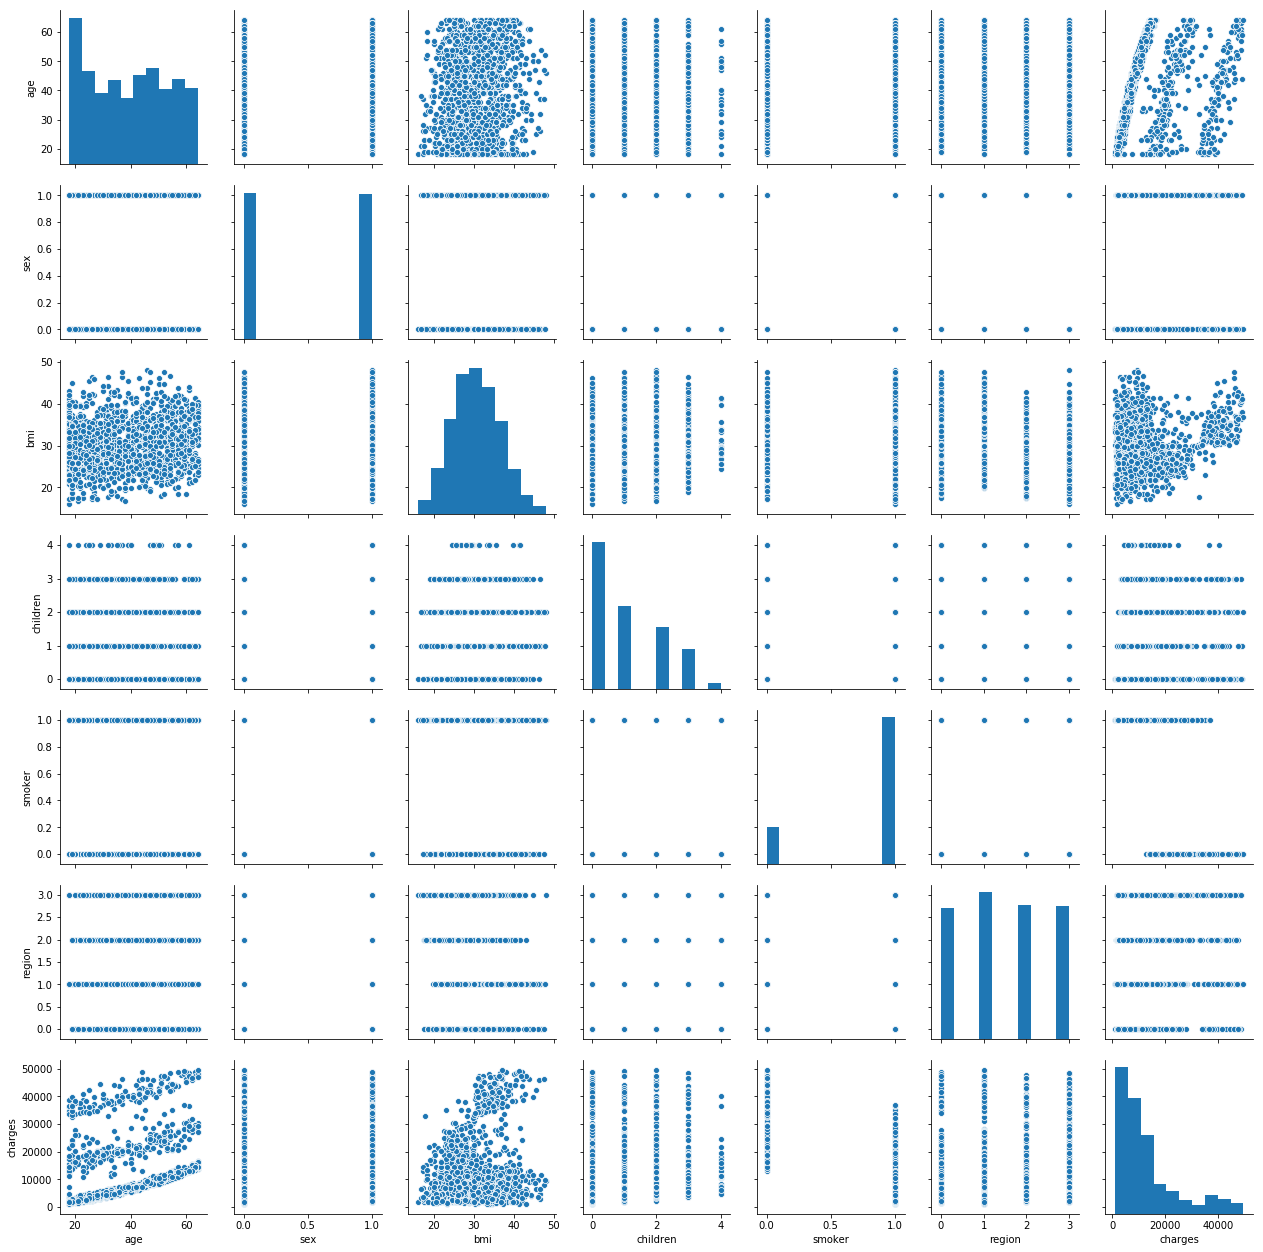

In [26]:
sns.pairplot(charge_df)
plt.show()

# Splitting of test and train dataset

In [27]:
np.random.seed(0)
df_train, df_test = train_test_split(charge_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['bmi','charges']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,age,sex,bmi,children,smoker,region,charges
140,34,0,0.201183,2,1,3,0.548601
498,44,1,0.249766,2,1,1,0.147989
546,28,0,0.606509,0,1,3,0.044678
1137,26,1,0.195266,0,1,2,0.042743
854,49,1,0.245562,3,0,3,0.480268


In [31]:
y_train = df_train.pop('charges')
X_train = df_train

# Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 5)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('sex', False, 2),
 ('bmi', True, 1),
 ('children', True, 1),
 ('smoker', True, 1),
 ('region', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['age', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['sex'], dtype='object')

# Building model using statsmodel, for the detailed statistics 

In [37]:
X_train_rfe = X_train[col]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     504.4
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          2.34e-259
Time:                        18:54:53   Log-Likelihood:                 598.06
No. Observations:                 916   AIC:                            -1184.
Df Residuals:                     910   BIC:                            -1155.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2894      0.019     15.254      0.0

In [41]:
# region has p-value of 0.008 so we drop it
X_train_new = X_train_rfe.drop(["region"], axis = 1)

Rebuilding the model without region

In [42]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [43]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [44]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     624.5
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          3.05e-259
Time:                        18:54:57   Log-Likelihood:                 594.49
No. Observations:                 916   AIC:                            -1179.
Df Residuals:                     911   BIC:                            -1155.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3096      0.017     17.735      0.0

In [45]:
#children has p-value of 0.001
X_train_new = X_train_new.drop(["children"], axis = 1)

Rebuilding the model without childre,region

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_1 = sm.add_constant(X_train_new)

In [47]:
lm_1 = sm.OLS(y_train,X_train_lm_1).fit()   # Running the linear model

In [48]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     819.2
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          3.14e-258
Time:                        18:55:07   Log-Likelihood:                 588.68
No. Observations:                 916   AIC:                            -1169.
Df Residuals:                     912   BIC:                            -1150.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3211      0.017     18.636      0.0

In [49]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.72
1,age,1.01
2,bmi,1.01
3,smoker,1.00


In [50]:
#we are dropping const it has high vif
X= X.drop(['const'], axis=1)

In [51]:
y_train_charges = lm.predict(X_train_lm)

In [52]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

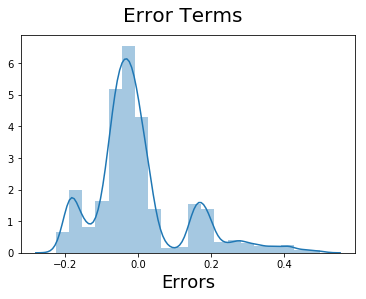

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_charges), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

# Making Predictions

Applying the scaling on the test sets

In [54]:
num_vars = ['bmi','charges']
df_test[num_vars] = scaler.transform(df_test[num_vars])

Dividing into X_test and y_test

In [55]:
y_test = df_test.pop('charges')
X_test = df_test

In [56]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [57]:
# Making predictions
y_pred = lm_1.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

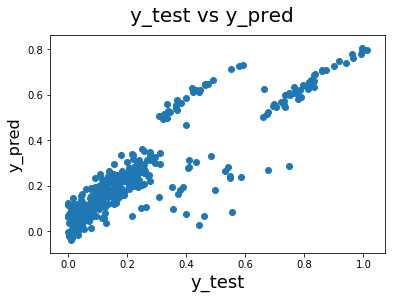

In [58]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [59]:
lm_1.params

const     0.321106
age       0.005307
bmi       0.212595
smoker   -0.471354
dtype: float64

# Conclusion

# Best fit line

charges=0.32+0.0053*age+0.2125*bmi-0.4713*smoker